In [1]:
fp=open("/home/node/ann/mycode/cluster/experiment_data/v1/bep_max_min_ids.txt")

max_bp=[]
min_bp=[]
all_ids=set()

i=0
for line in fp:
    max_ids=line.strip().split(";")[0]
    min_ids=line.strip().split(";")[1]
    max_ids=max_ids.split(",")
    min_ids=min_ids.split(",")
    all_ids.update(max_ids)
    all_ids.update(min_ids)
    max_bp.append((i, max_ids))
    min_bp.append((i, min_ids))
    i=i+1

print(all_ids)

{'1921238', '5837815', '7103769', '3064652', '5307158', '2382040', '7013048', '6554330', '9948298', '4632694', '3827605', '5756698', '3518350'}


In [2]:
# map
i=0
mapped_y={}
for origin in all_ids:
    mapped_y[origin]="bep"+str(i)
    i=i+1

# print(mapped_y)
# print(max_bp)

tmp=[]
for (k,v) in max_bp:
    v1=[mapped_y[x] for x in v ]
    tmp.append((k,v1))
max_bp=tmp


tmp=[]
for (k,v) in min_bp:
    v1=[mapped_y[x] for x in v]
    tmp.append((k,v1))
min_bp=tmp


In [3]:
max_bp1=max_bp[:25]
max_bp2=max_bp[25:50]
max_bp3=max_bp[50:75]
max_bp4=max_bp[75:100]
min_bp1=min_bp[:25]
min_bp2=min_bp[25:50]
min_bp3=min_bp[50:75]
min_bp4=min_bp[75:100]

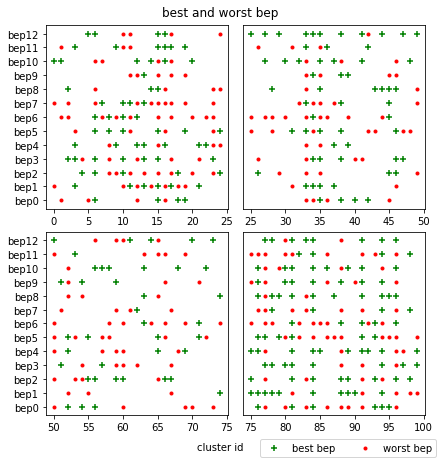

In [58]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, constrained_layout=True)
plt.rcParams["figure.figsize"]=(6,6)

XS=[[],[],[],[]]
YS=[[],[],[],[]]
for i_plot in range(4):

    start=i_plot*25
    end=(i_plot+1)*25

    # 让纵坐标按顺序显示
    X=[i for i in range(start,start+13)]
    Y=['bep'+str(i) for i in range(13)]
    pos_x=int(i_plot/2)
    pos_y=i_plot%2
    axs[pos_x, pos_y].scatter(X,Y, c='w')

    X0=XS[i_plot]
    Y0=XS[i_plot]

    for (k,v) in max_bp[start:end]:
        X0=X0+([k]*len(v))
        Y0=Y0+v
    s1=axs[pos_x, pos_y].scatter(X0, Y0,marker='+',c='g', label="best bep")


    X1=XS[i_plot]
    Y1=XS[i_plot]
    for (k,v) in min_bp[start:end]:
        X1=X1+([k]*len(v))
        Y1=Y1+v
    s2=axs[pos_x, pos_y].scatter(X1, Y1, marker='.',c='r', label="worst bep")

    if pos_y == 1:
        axs[pos_x,pos_y].set_yticks([])


plt.suptitle('best and worst bep')
fig.text(0.5, -0.035, 'cluster id', ha='center')
fig.legend(loc=4, bbox_to_anchor=[1,-0.05], borderaxespad=0., handles=[s1,s2], ncol=2)
